In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2025)  # For reproducibility
from sklearn.linear_model import LogisticRegression
import time

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def generate_data(m):
    w_star = np.random.randn(10)
    w_star /= np.linalg.norm(w_star)
    X = np.zeros((m, 10))
    Y = np.zeros(m)
    for i in range(m):
        X[i] = np.random.randn(10)
        prob = sigmoid(w_star @ X[i])
        Y[i] = 1 if np.random.rand() < prob else 0
    return w_star, X, Y

#Debugging purpose
# w, X, Y = generate_data(1000)
# print("True weights:", w)
# print("First 5 samples of X:\n", X[:5])
# print("First 5 labels of Y:", Y[:5])


## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [3]:
def logistic_regression(X, Y):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X, Y)
    w_hat = clf.coef_.flatten()
    return w_hat

# Debugging logistic regression function
# w_hat = logistic_regression(X, Y)
# print("Learned weights using logistic regression:", w_hat)

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [4]:
def gradient(w, x, y):
    yhat = sigmoid(np.dot(w, x))
    return (yhat - y) * yhat * (1 - yhat) * x


def gd_sl(X, Y, n_iter=1000, eta=0.01):
    w = np.zeros(X.shape[1])
    for t in range(n_iter):
        grad = np.zeros_like(w)
        for i in range(X.shape[0]):
            grad += gradient(w, X[i], Y[i])
        grad /= X.shape[0]
        w -= eta * grad
    return w


# Debugging gradient function
# test_w = np.random.randn(10)
# test_x = np.random.randn(10)
# test_y = 1
# grad = gradient(test_w, test_x, test_y)
# print("Gradient test:")
# print("w:", test_w)
# print("x:", test_x)
# print("y:", test_y)
# print("Computed gradient:", grad)

# # Debugging gd_sl function
# print("\nTesting gd_sl function:")
# w_hat = gd_sl(X, Y, n_iter=10, eta=0.01)
# print("Initial weights:", np.zeros(X.shape[1]))
# print("Learned weights after 10 iterations:", w_hat)


## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [5]:
def sgd(X, Y, n_iter=1000, eta=0.01):
    w = np.zeros(X.shape[1])  
    for t in range(n_iter):
        i = np.random.randint(X.shape[0])  # Randomly select a training example
        grad = gradient(w, X[i], Y[i])  # Compute gradient
        w -= eta * grad  # Update weights
    return w

# Debugging SGD
# w_hat_sgd = sgd(X, Y, n_iter=10, eta=0.01)
# print("Initial weights:", np.zeros(X.shape[1]))
# print("Learned weights after 10 iterations:", w_hat_sgd)


## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

In [6]:
sample_sizes = [50, 100, 150, 200, 250]

def evaluate(model, num_trials=10):
    errors = []
    for m in sample_sizes:
        trial_errors = []
        for _ in range(num_trials):
            w_star, X, Y = generate_data(m)
            w_hat = model(X, Y)
            error = np.linalg.norm(w_hat - w_star)
            trial_errors.append(error)
        errors.append(np.mean(trial_errors))
    return errors

# Track time for logistic regression
start_time = time.time()
lr_errors = evaluate(logistic_regression)
lr_time = time.time() - start_time

# Track time for gradient descent with square loss
start_time = time.time()
gd_errors = evaluate(gd_sl)
gd_time = time.time() - start_time

# Track time for stochastic gradient descent
start_time = time.time()
sgd_errors = evaluate(sgd)
sgd_time = time.time() - start_time

# Print the times for each algorithm
print(f"Logistic Regression Time: {lr_time:.2f} seconds")
print(f"Gradient Descent with Square Loss Time: {gd_time:.2f} seconds")
print(f"Stochastic Gradient Descent Time: {sgd_time:.2f} seconds")

Logistic Regression Time: 0.08 seconds
Gradient Descent with Square Loss Time: 12.66 seconds
Stochastic Gradient Descent Time: 0.17 seconds


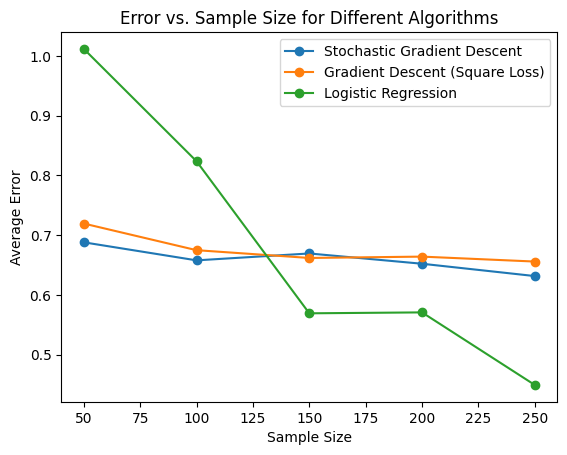

In [7]:
plt.plot(sample_sizes, sgd_errors, label='Stochastic Gradient Descent', marker='o')
plt.plot(sample_sizes, gd_errors, label='Gradient Descent (Square Loss)', marker='o')
plt.plot(sample_sizes, lr_errors, label='Logistic Regression', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Average Error')
plt.title('Error vs. Sample Size for Different Algorithms')
plt.legend()
plt.show()

# Problem 2

In [8]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [9]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

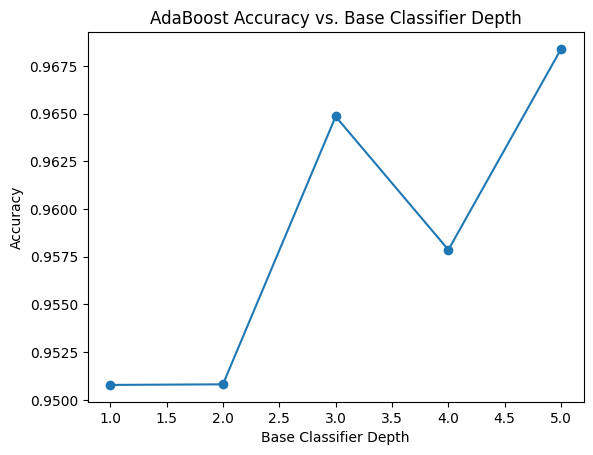

In [10]:

depths = range(1, 6)
errors = []
for d in depths:
    base = DecisionTreeClassifier(max_depth=d, random_state=101)
    clf = AdaBoostClassifier(estimator=base, n_estimators=10, learning_rate=1, random_state=101)
    scores = cross_val_score(clf, cancer.data, cancer.target, cv=10)
    error = np.mean(scores)
    errors.append(error)


plt.plot(depths, errors, marker='o')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs. Base Classifier Depth')
plt.show()